In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, ElasticNetCV

In [2]:
raw_data = pd.read_csv("final_df.csv")
raw_data.rename(columns = {"Unnamed: 0":"date"},inplace=True)
raw_data.set_index(raw_data["date"],inplace=True)
raw_data.drop(columns = ["date"],inplace=True)
df = raw_data.copy()

#### Removing outliers

In [3]:
df["Unemployment construction"] = np.log(df["Unemployment construction"])
df["House for sale to sold"] = np.log(df["House for sale to sold"])
df["Average expenditure 35 - 44"] = df["Average expenditure 35 - 44"] + df["Average expenditure 45 - 54"]

# Adding GDP per capita
df["gdp_per_capita"] = df["GDP"] / df["Population"]

#### CPI Trend

In [4]:
df["CPI_TREND"] = df["CPI"].apply(lambda x : "UP" if x > 0 else "DOWN")
df["CPI_TREND"].value_counts()

CPI_TREND
UP      155
DOWN     73
Name: count, dtype: int64

#### GDP trend

In [5]:
df["GDP_RATE"] = np.log(df["GDP"]/df["GDP"].shift(12))
df["GDP_TREND"] = df["GDP_RATE"].apply(lambda x : "UP" if x > 0 else "DOWN")

####  Employees construction trend

In [6]:
df["EMP_CONST_RATE"] = np.log(df["Employees Construction"]/df["Employees Construction"].shift(12))
df["EMP_CONST_TREND"] = df["EMP_CONST_RATE"].apply(lambda x : "UP" if x > 0 else "DOWN")

#### House supply trend 

In [7]:
df["houses_for_sale_to_sold_rate"] = np.log(df["House for sale to sold"]/df["House for sale to sold"].shift(12))
df["HOUSES_S2S_TREND"] = df["houses_for_sale_to_sold_rate"].apply(lambda x : "UP" if x > 0 else "DOWN")

#### Using cumulative sum in features

In [8]:
df["CPI cum_sum"] = df["CPI"].cumsum()
df["House for sale to sold cum_sum"] = df["House for sale to sold"].cumsum()
df["Private house under Construction cum_sum"] = df["Price house under Construction"].cumsum()
df["Private owned house cum_sum"] = df["Private owned house "].cumsum()
df["Private house under Construction Rate"] = np.log(df["Private house under Construction cum_sum"]/df["Private house under Construction cum_sum"].shift(12))
df["Private owned house rate"] = np.log(df["Private owned house cum_sum"]/df["Private owned house cum_sum"].shift(12))

In [9]:
df["Private house under Construction Rate Trend"] =  df["Private house under Construction Rate"].apply(lambda x : "UP" if x > 0 else "DOWN")
df["Private owned house rate trend"] =  df["Private owned house rate"].apply(lambda x : "UP" if x > 0 else "DOWN")

In [10]:
df.to_csv("final_df_added_features.csv")

In [11]:
final_df = pd.read_csv("final_df_added_features.csv")
final_df.drop(columns = ["date"],inplace=True)

In [12]:
final_df = final_df.drop(['DATE'], axis= 1) 
Y = pd.read_csv('target.csv')
final_df['target'] = Y[['target']]

In [13]:
final_df = pd.get_dummies(final_df,drop_first=True).dropna()

trainx = final_df.drop(['target'], axis= 1)
trainy = final_df['target']

X = trainx.copy()
Y = trainy.copy()

#### Model

In [14]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [15]:
reg = LassoCV()
reg.fit(X, Y)

coef = pd.Series(reg.coef_, index = trainx.columns)

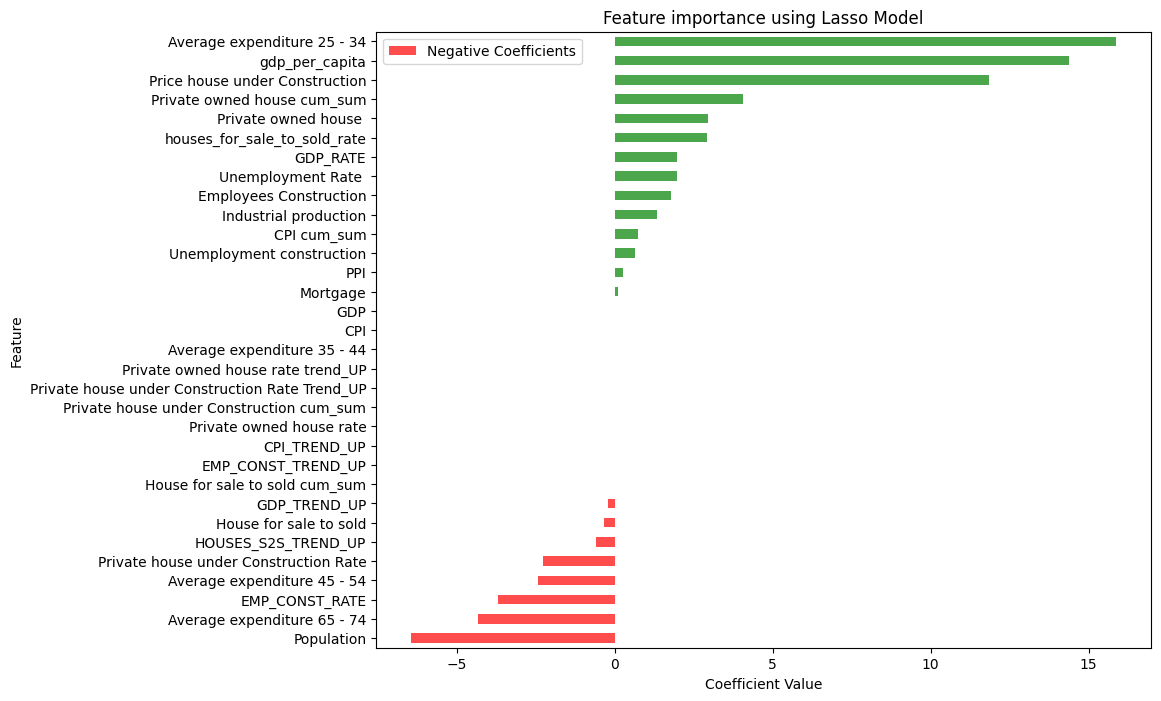

In [16]:
imp_coef = coef.sort_values()
colors = np.where(imp_coef < 0, 'red', 'green') 

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
ax = imp_coef.plot(kind='barh', color=colors, alpha=0.7) 
plt.title("Feature importance using Lasso Model")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")

ax.legend(['Negative Coefficients', 'Positive Coefficients'])

plt.show()



# Important Feature for Home Price Index

In [17]:
((coef[coef!=0]).sort_values(ascending=False))

Average expenditure 25 - 34              15.856588
gdp_per_capita                           14.389140
Price house under Construction           11.858837
Private owned house cum_sum               4.048199
Private owned house                       2.941883
houses_for_sale_to_sold_rate              2.915406
GDP_RATE                                  1.982421
Unemployment Rate                         1.971104
Employees Construction                    1.791776
Industrial production                     1.335036
CPI cum_sum                               0.749792
Unemployment construction                 0.635506
PPI                                       0.259826
Mortgage                                  0.089829
House for sale to sold cum_sum           -0.002498
GDP_TREND_UP                             -0.201288
House for sale to sold                   -0.325406
HOUSES_S2S_TREND_UP                      -0.580225
Private house under Construction Rate    -2.262778
Average expenditure 45 - 54    